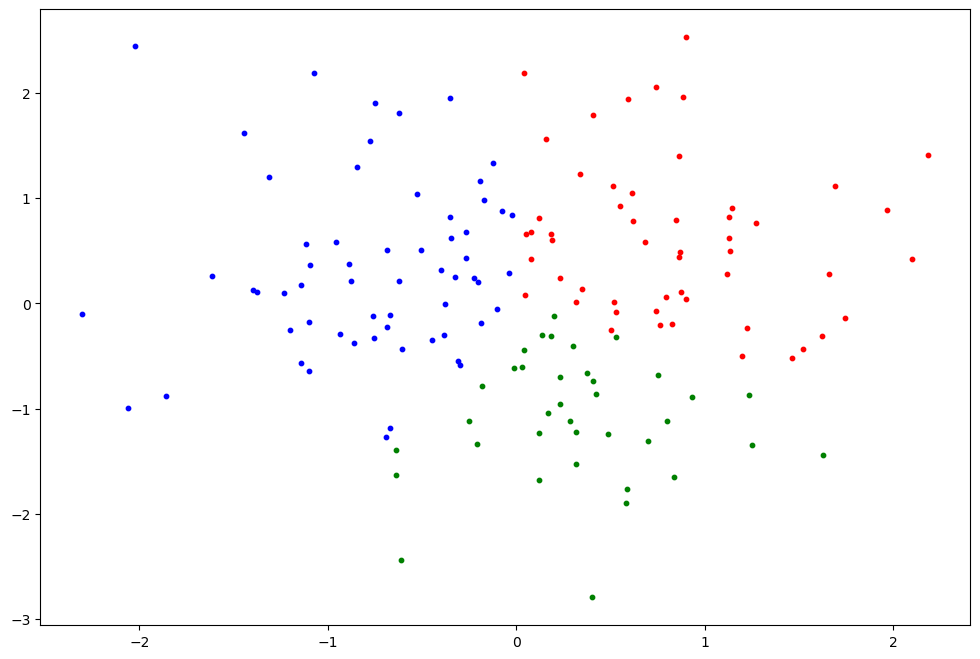

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 毎回同じ乱数が生成されるようにseedを固定しておく.
np.random.seed(seed=1)

# 平均0 標準偏差1 の乱数を150個生成
x = list(np.random.randn(150))
y = list(np.random.randn(150))

C1x = []
C2x = []
C3x = []
C1y = []
C2y = []
C3y = []
index_list = []

for i,data in enumerate(y):
    if x[i] >= 0:
        if data <= -(x[i])/2:
            C3y.append(data)
            C3x.append(x[i])
            index_list.append(i)
    else:
        if data <= 2*x[i]:
            C3y.append(data)
            C3x.append(x[i])
            index_list.append(i)

index_list = np.sort(index_list)[::-1]
for i in index_list:
    x.pop(i)
    y.pop(i)

for i,data in enumerate(x):
    if data > 0:
        C1x.append(data)
        C1y.append(y[i])
    else:
        C2x.append(data)
        C2y.append(y[i])


dataset1 = [[i,j,'1'] for i,j in zip(C1x,C1y)]
dataset2 = [[i,j,'2'] for i,j in zip(C2x,C2y)]
dataset3 = [[i,j,'3'] for i,j in zip(C3x,C3y)]
dataset = np.vstack((dataset1,dataset2,dataset3))

fig = plt.figure(figsize=(12,8))
plt.scatter(C1x,C1y,color='red',s=10)
plt.scatter(C2x,C2y,color='blue',s=10)
plt.scatter(C3x,C3y,color='green',s=10)
plt.show()

[0.05056171 0.49995133]


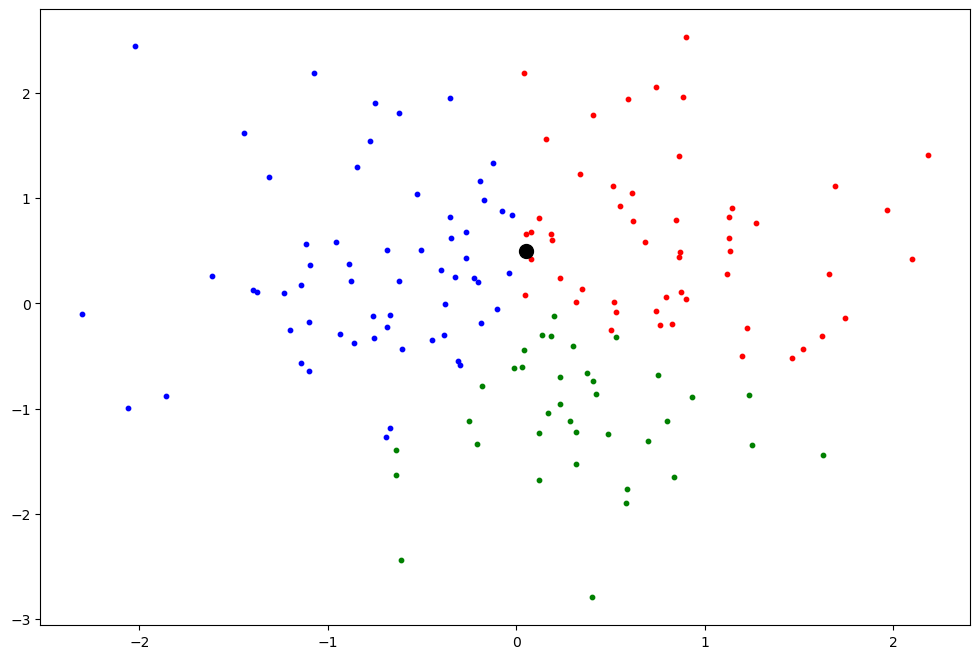

In [11]:
# 未知のデータを設定
np.random.seed(4)
unknown_data = np.random.randn(2)
print(unknown_data)

fig = plt.figure(figsize=(12,8))
plt.scatter(C1x,C1y,color='red',s=10)
plt.scatter(C2x,C2y,color='blue',s=10)
plt.scatter(C3x,C3y,color='green',s=10)
plt.scatter(unknown_data[0],unknown_data[1],color='black',s=100)
plt.show()

In [14]:
# kNNによるクラス判別
def kNN(k,u):
    # 全サンプルと観測データ間のユークリッド距離を計算
    # 距離を計算したサンプルのラベルも記憶
    dist_list = []
    label_list = []
    for i,j in enumerate(dataset):
        dist_list.append([np.sqrt((float(j[0])-u[0])**2+(float(j[1])-u[1])**2),j[2]])
    
    # 距離が小さい順に並べ替える
    dist_list.sort()
    # 最近傍サンプルk個でクラス判別のための多数決を行う
    class_label = [0,0,0]
    for i in range(k):
        if dist_list[i][1] == '1': class_label[0]+=1
        elif dist_list[i][1] == '2': class_label[1]+=1
        elif dist_list[i][1] == '3': class_label[2]+=1
    
    print("最近傍サンプル",k,"個の内訳 : [赤(1),青(2),緑(3)] =",class_label)
    print()
    print("kNNによる判別の結果,観測データのクラスラベルは", class_label.index(max(class_label))+1,"です.")
    
    if class_label.index(max(class_label))+1 == 1: color = 'red'
    elif class_label.index(max(class_label))+1 == 2: color = 'blue'
    elif class_label.index(max(class_label))+1 == 3: color = 'green'
    
    fig = plt.figure(figsize=(12,8))
    plt.scatter(C1x,C1y,color='red',s=10)
    plt.scatter(C2x,C2y,color='blue',s=10)
    plt.scatter(C3x,C3y,color='green',s=10)
    plt.scatter(unknown_data[0],unknown_data[1],color=color,s=100)
    plt.show()


最近傍サンプル 10 個の内訳 : [赤(1),青(2),緑(3)] = [7, 3, 0]

kNNによる判別の結果,観測データのクラスラベルは 1 です.


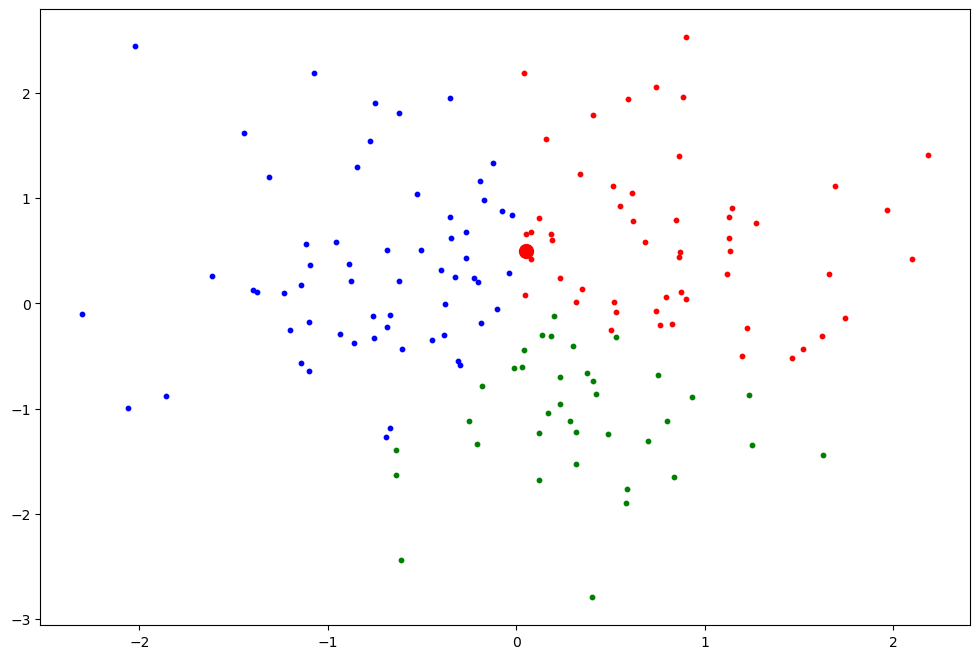

In [15]:
# k=10のとき
kNN(10,unknown_data)

最近傍サンプル 150 個の内訳 : [赤(1),青(2),緑(3)] = [53, 60, 37]

kNNによる判別の結果,観測データのクラスラベルは 2 です.


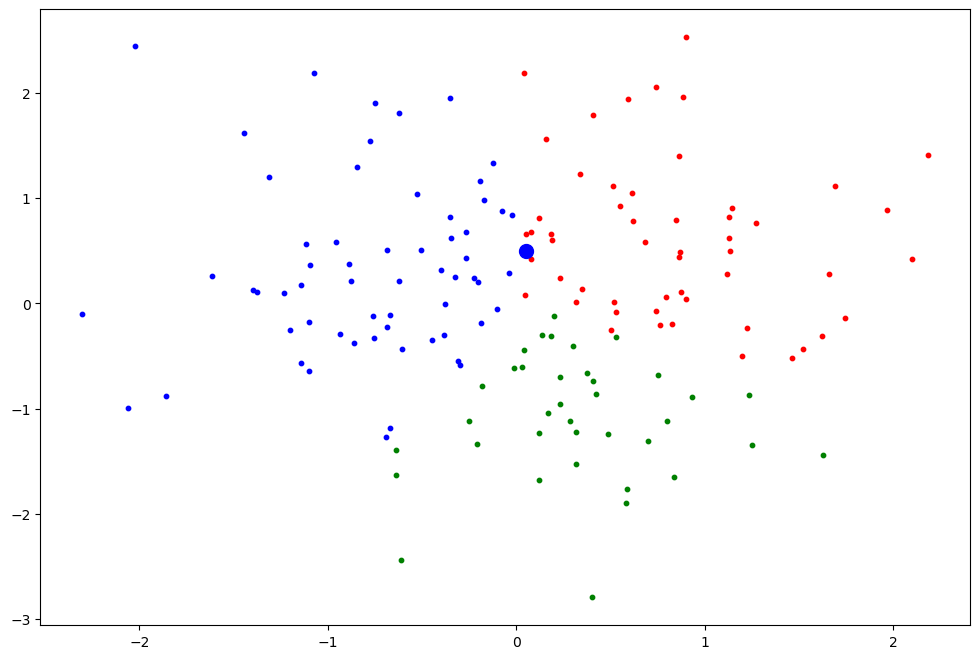

In [16]:
# k=150のとき(全ての要素の中で一番多い色が選ばれてしまう)
kNN(150,unknown_data)